
# Room_Created
Analysis is done on basis files that were proccessed during the frst 9 days of December 2021.


## Import the relevant libraries

In [14]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
sns.set()

## Load all parquet files that were available with that message

In [15]:
RoomCreated_Messages = pd.read_parquet("Documents/ugo_room_created", engine='auto')
RoomCreated_Messages

,RoomNotifications
0,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
1,[{'NotificationMeta': {'X-Correlation-ID': '25...
2,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
3,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
4,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
5,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
6,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
7,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
8,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
9,[{'NotificationMeta': {'X-Correlation-ID': 'OF...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [16]:
firstLevel = []
for index, level in RoomCreated_Messages.iterrows():
    firstLevel.extend(RoomCreated_Messages.iloc[index,0])

### Resolving all levels of nesting<hr>

In [17]:
import pandas as pd
import numpy as np
import ast

def resolveRow(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def createDF(li, key_level=""):
    listOfResolved = []
    for level in li:
        row_data = None
        level1 = {}
        wrong = []
        if not isinstance(level, str):          
            for key, value in level.items():
                if isinstance(value, np.ndarray):
                    if (value.size!=0):
                        row_data = createDF(value, key)
                    else:
                        level1[key_level + "_" + key] = []
                        
                elif isinstance(value, dict):
                    level1.update(value)
                elif isinstance(value, list):
                    for i in value:
                        if isinstance(i, dict):
                            level1.update(i)
                else:
                    level1[key_level + "_" + key] = value

            if row_data is not None:
                newDi = resolveRow(level1, row_data)
                listOfResolved.extend(newDi)
            else:
                listOfResolved.append(level1)
        else:
            wrong.append(level)
            
    return listOfResolved


def checkType(new):
    key_types = []
    values_t = []
    for n in new:
        new_keys = [type(z) for z in n.values()]
        if (new_keys in key_types) | len(key_types) == 0:
            key_types.append(new_keys)
        else:
            continue
    for z in key_types:
        values_t.extend([True if n in [np.ndarray, dict, list] else False for n in z])

    return any(values_t)

def allTogether(firstLevel):
    levelTemp = createDF(firstLevel)
    while checkType(levelTemp):
        newL = createDF(levelTemp)
        levelTemp = newL
    return levelTemp
    
final = allTogether(firstLevel)

### Creating DataFrame<hr>

In [18]:
finalData_raw = pd.DataFrame(final)
finalData_raw.columns = [re.sub("^_+","",x) for x in finalData_raw.columns]
finalData_raw

,X-Correlation-ID,Type,CmHotelId,CmRoomId,Origin,Name,MaxAdults,MinAdults,ExtraChildren,MaxChildAge,ApplicableRatePlans,Description,BedConfigurations,SmokingPermitted,Fees,OriginalData
0,OFF321818-5,ROOM_CREATED,None,S2K,dhisco,1 KING DELUXE STUDIO SUITE NSMK WITH FREE WIFI...,2,None,NaN,NaN,None,1 KING DELUXE STUDIO SUITE NSMK WITH FREE WIFI...,None,None,None,
1,25d5144f-5317-4c59-ae8a-5014bb8d54f0,ROOM_CREATED,None,64882,siteminder,Studio with Balcony,2,None,NaN,NaN,None,Studio 2 personnes,None,None,None,"{""bidroom_hotel_id"":""592233""}"
2,f64b060c-f837-4b6f-8d8b-7cd63e751d7c,ROOM_CREATED,None,64885,siteminder,Two-Bedroom Apartment,2,None,NaN,NaN,None,3 pièces 6 personnes,None,None,None,"{""bidroom_hotel_id"":""592233""}"
3,0561928a-5a1e-49c7-a0ed-69beb15a003c,ROOM_CREATED,None,64884,siteminder,One-Bedroom Apartment,2,None,NaN,NaN,None,2 pièces 6 personnes,None,None,None,"{""bidroom_hotel_id"":""592233""}"
4,8d81c03c-6122-4ab3-95bc-cd1aeb331a36,ROOM_CREATED,None,64883,siteminder,Studio,2,None,NaN,NaN,None,Studio 4 personnes,None,None,None,"{""bidroom_hotel_id"":""592233""}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,OFF322067-1,ROOM_CREATED,None,OSBN,derbysoft,1 DOUBLE BED WITH SOFA BED NONSMOKING,2,None,NaN,NaN,None,None,None,None,None,
201,OFF322067-1,ROOM_CREATED,None,CSTN,derbysoft,STANDARD ROOM,2,None,NaN,NaN,None,None,None,None,None,
202,OFF322067-1,ROOM_CREATED,None,CDXN,derbysoft,DELUXE ROOM,2,None,NaN,NaN,None,None,None,None,None,
203,OFF322001-8,ROOM_CREATED,None,OWCN,derbysoft,1 Queen Bed Standard Accessible,2,None,NaN,NaN,None,None,None,None,None,


#### Converting string representation od a dict and changing to column

In [19]:
 finalData_raw["OriginalData"].unique()

array(['', '{"bidroom_hotel_id":"592233"}'], dtype=object)

In [20]:
finalData_raw["newOriginal"] = [ast.literal_eval(x) if x != '' else None for x in finalData_raw["OriginalData"]]

In [21]:
finalData_raw["bidroom_hotel_id"] = [x["bidroom_hotel_id"] if x is not None else None for x in finalData_raw["newOriginal"]]

### Creating working dataset

In [23]:
RoomCreated = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [24]:
RoomCreated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X-Correlation-ID     205 non-null    object 
 1   Type                 205 non-null    object 
 2   CmHotelId            0 non-null      object 
 3   CmRoomId             205 non-null    object 
 4   Origin               205 non-null    object 
 5   Name                 205 non-null    object 
 6   MaxAdults            205 non-null    int64  
 7   MinAdults            0 non-null      object 
 8   ExtraChildren        2 non-null      float64
 9   MaxChildAge          2 non-null      float64
 10  ApplicableRatePlans  0 non-null      object 
 11  Description          15 non-null     object 
 12  BedConfigurations    0 non-null      object 
 13  SmokingPermitted     0 non-null      object 
 14  Fees                 0 non-null      object 
 15  OriginalData         205 non-null    obj

In [25]:
RoomCreated.head(5).transpose()

,0,1,2,3,4
X-Correlation-ID,OFF321818-5,25d5144f-5317-4c59-ae8a-5014bb8d54f0,f64b060c-f837-4b6f-8d8b-7cd63e751d7c,0561928a-5a1e-49c7-a0ed-69beb15a003c,8d81c03c-6122-4ab3-95bc-cd1aeb331a36
Type,ROOM_CREATED,ROOM_CREATED,ROOM_CREATED,ROOM_CREATED,ROOM_CREATED
CmHotelId,None,None,None,None,None
CmRoomId,S2K,64882,64885,64884,64883
Origin,dhisco,siteminder,siteminder,siteminder,siteminder
Name,1 KING DELUXE STUDIO SUITE NSMK WITH FREE WIFI...,Studio with Balcony,Two-Bedroom Apartment,One-Bedroom Apartment,Studio
MaxAdults,2,2,2,2,2
MinAdults,None,None,None,None,None
ExtraChildren,NaN,NaN,NaN,NaN,NaN
MaxChildAge,NaN,NaN,NaN,NaN,NaN


### Basic statistic for data<hr>

In [26]:
RoomCreated.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,205,53,OFF321870-9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,205,1,ROOM_CREATED,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmHotelId,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmRoomId,205,111,CSTN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,205,4,derbysoft,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,205,153,Standard Room,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxAdults,205.0,NaN,NaN,NaN,1.721951,0.459919,1.0,1.0,2.0,2.0,3.0
MinAdults,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExtraChildren,2.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
MaxChildAge,2.0,NaN,NaN,NaN,16.0,0.0,16.0,16.0,16.0,16.0,16.0


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [27]:
RoomCreated = RoomCreated.drop(columns=["CmHotelId","MinAdults","ApplicableRatePlans","BedConfigurations","SmokingPermitted",
                                                                     "Fees","OriginalData","newOriginal"])

In [28]:
RoomCreated.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,205,53,OFF321870-9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,205,1,ROOM_CREATED,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmRoomId,205,111,CSTN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,205,4,derbysoft,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,205,153,Standard Room,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxAdults,205.0,NaN,NaN,NaN,1.721951,0.459919,1.0,1.0,2.0,2.0,3.0
ExtraChildren,2.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
MaxChildAge,2.0,NaN,NaN,NaN,16.0,0.0,16.0,16.0,16.0,16.0,16.0
Description,15,15,1 KING DELUXE STUDIO SUITE NSMK WITH FREE WIFI...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bidroom_hotel_id,5,1,592233,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking null values for CmRoomId

In [29]:
RoomCreated.CmRoomId.isna().sum()

0

#### Checking null values for Origin

In [30]:
RoomCreated.Origin.unique()

array(['dhisco', 'siteminder', 'derbysoft', 'premierinn'], dtype=object)

In [31]:
RoomCreated.Origin.isna().sum()

0

#### CmRoomId breaking by Origin

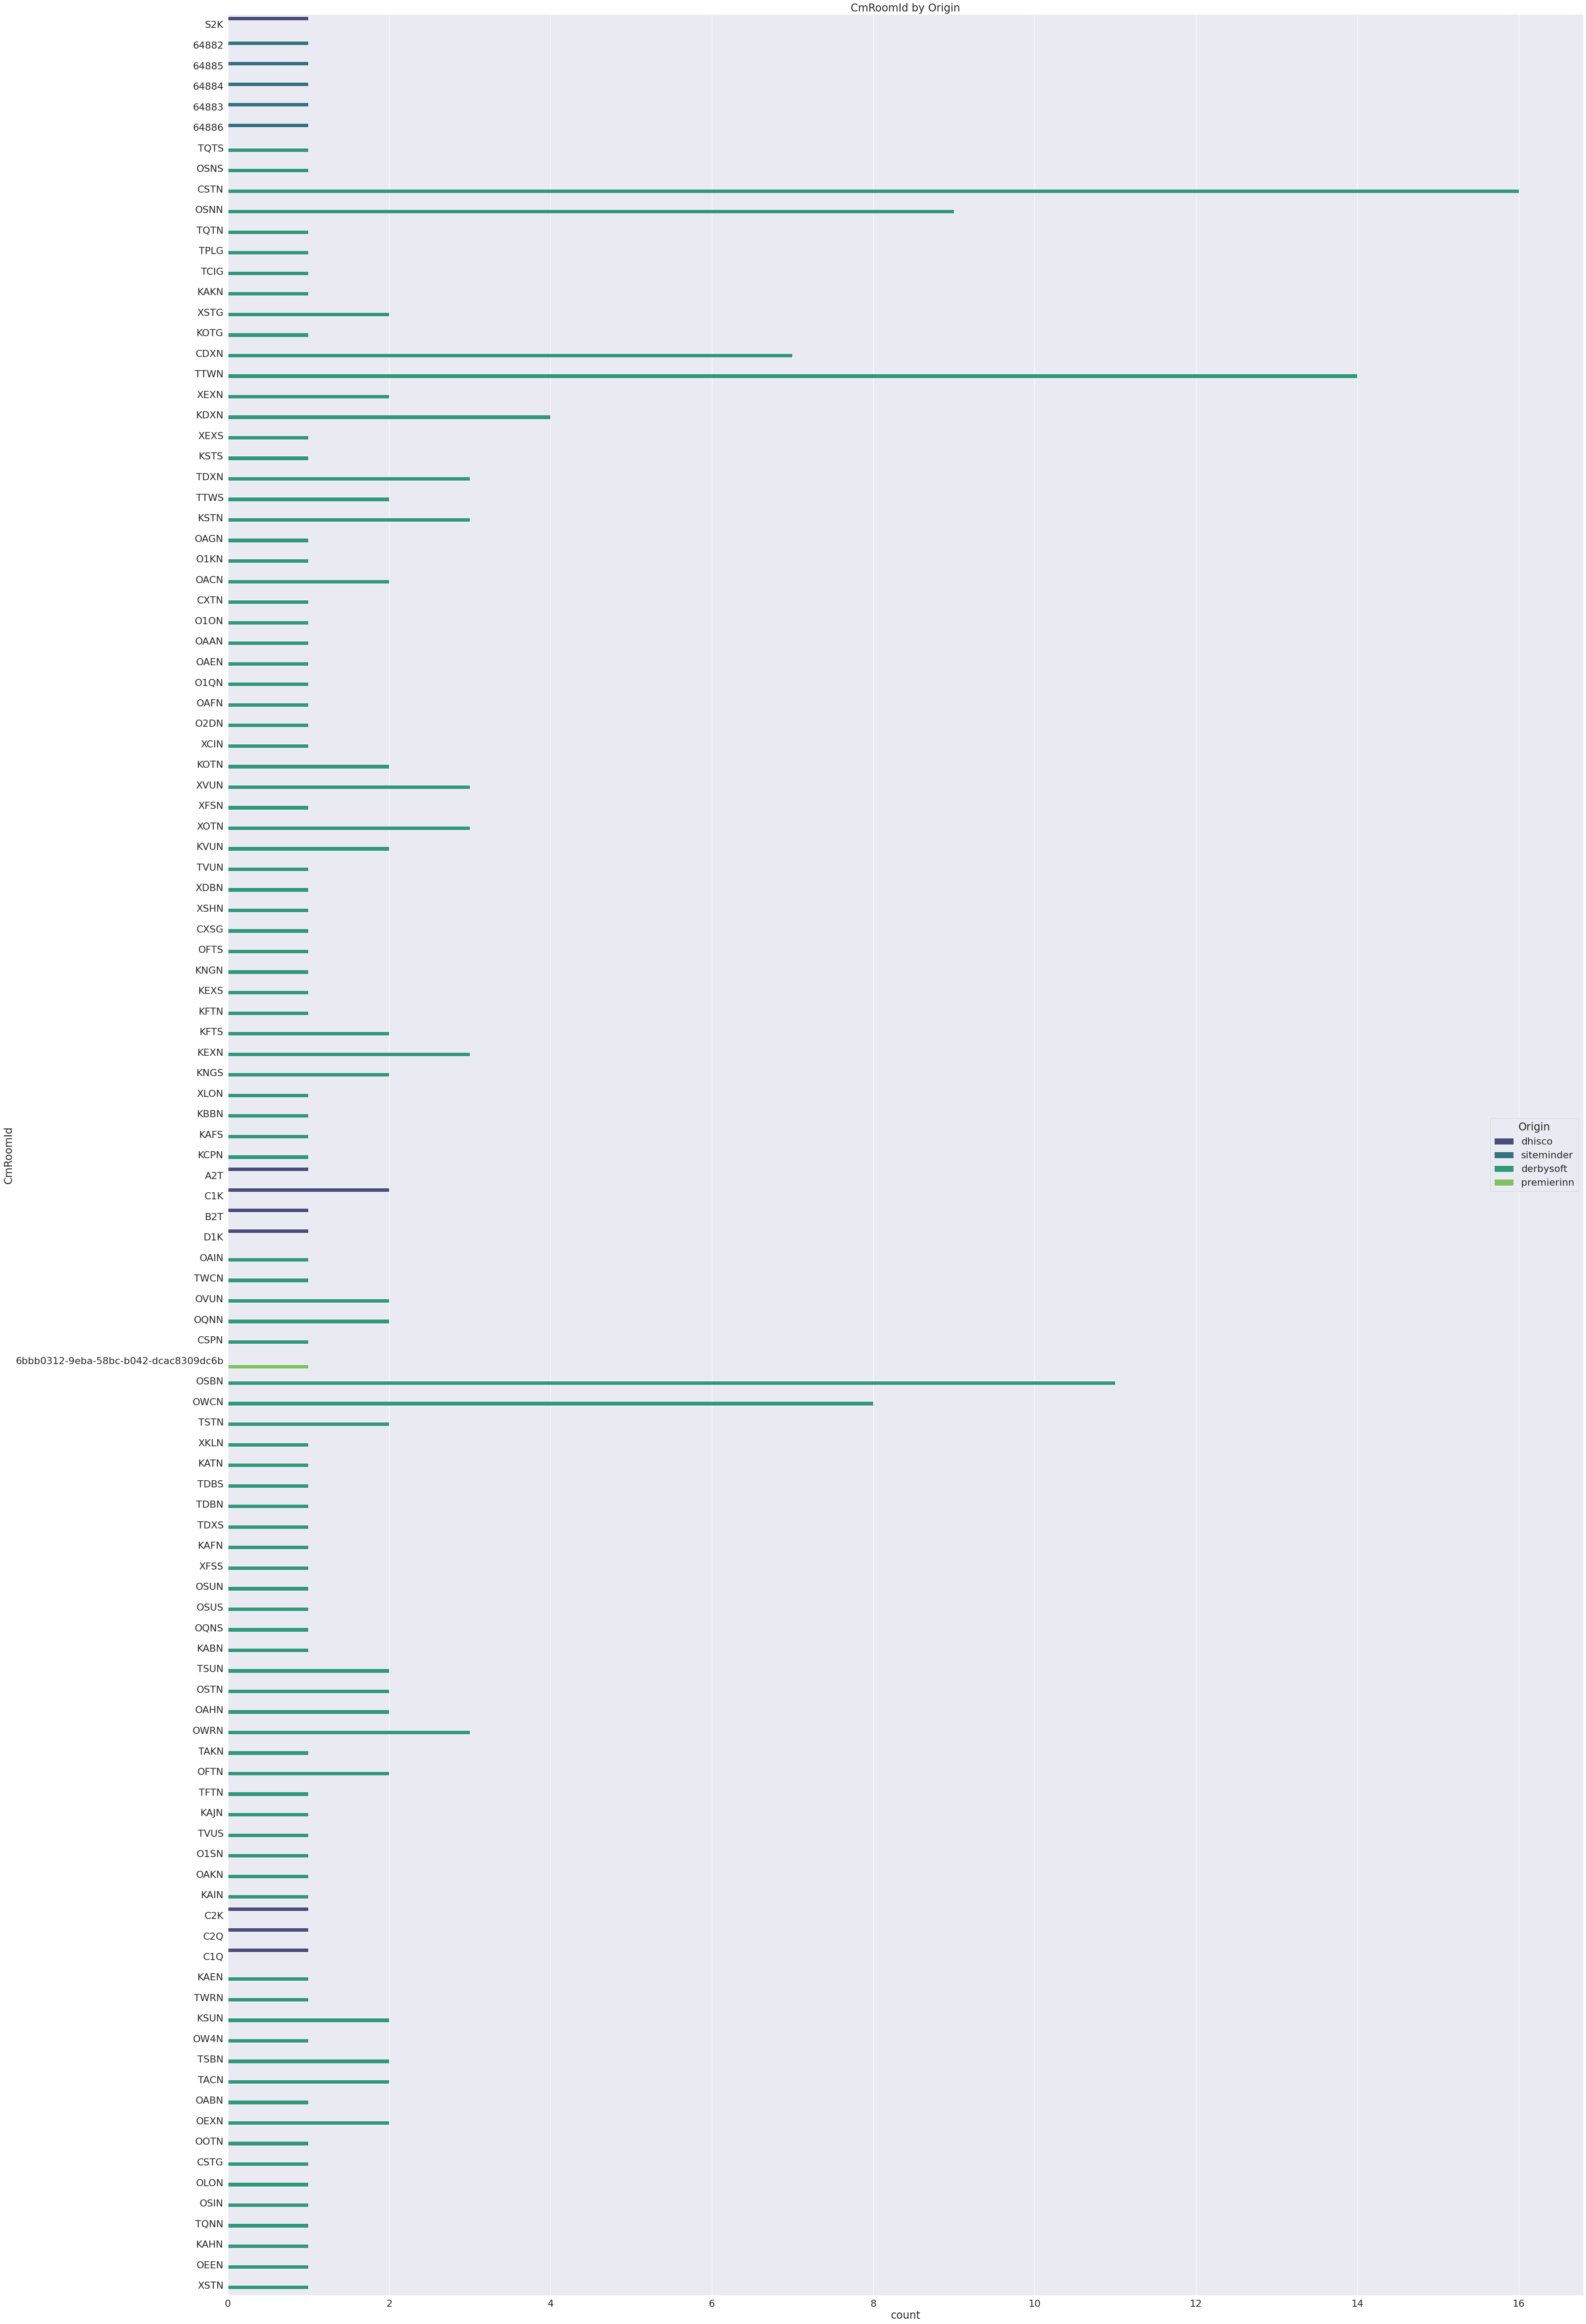

In [52]:
plt.figure(figsize=(55,95))
sns.set(font_scale = 2)
sns.countplot(y = RoomCreated.CmRoomId, data = RoomCreated, hue = RoomCreated.Origin, palette = 'viridis', orient = "h")
plt.title("CmRoomId by Origin")
plt.show()

#### Checking for null values for Name column

In [43]:
RoomCreated.Name.isna().sum()

0

#### Name breaking by Origin

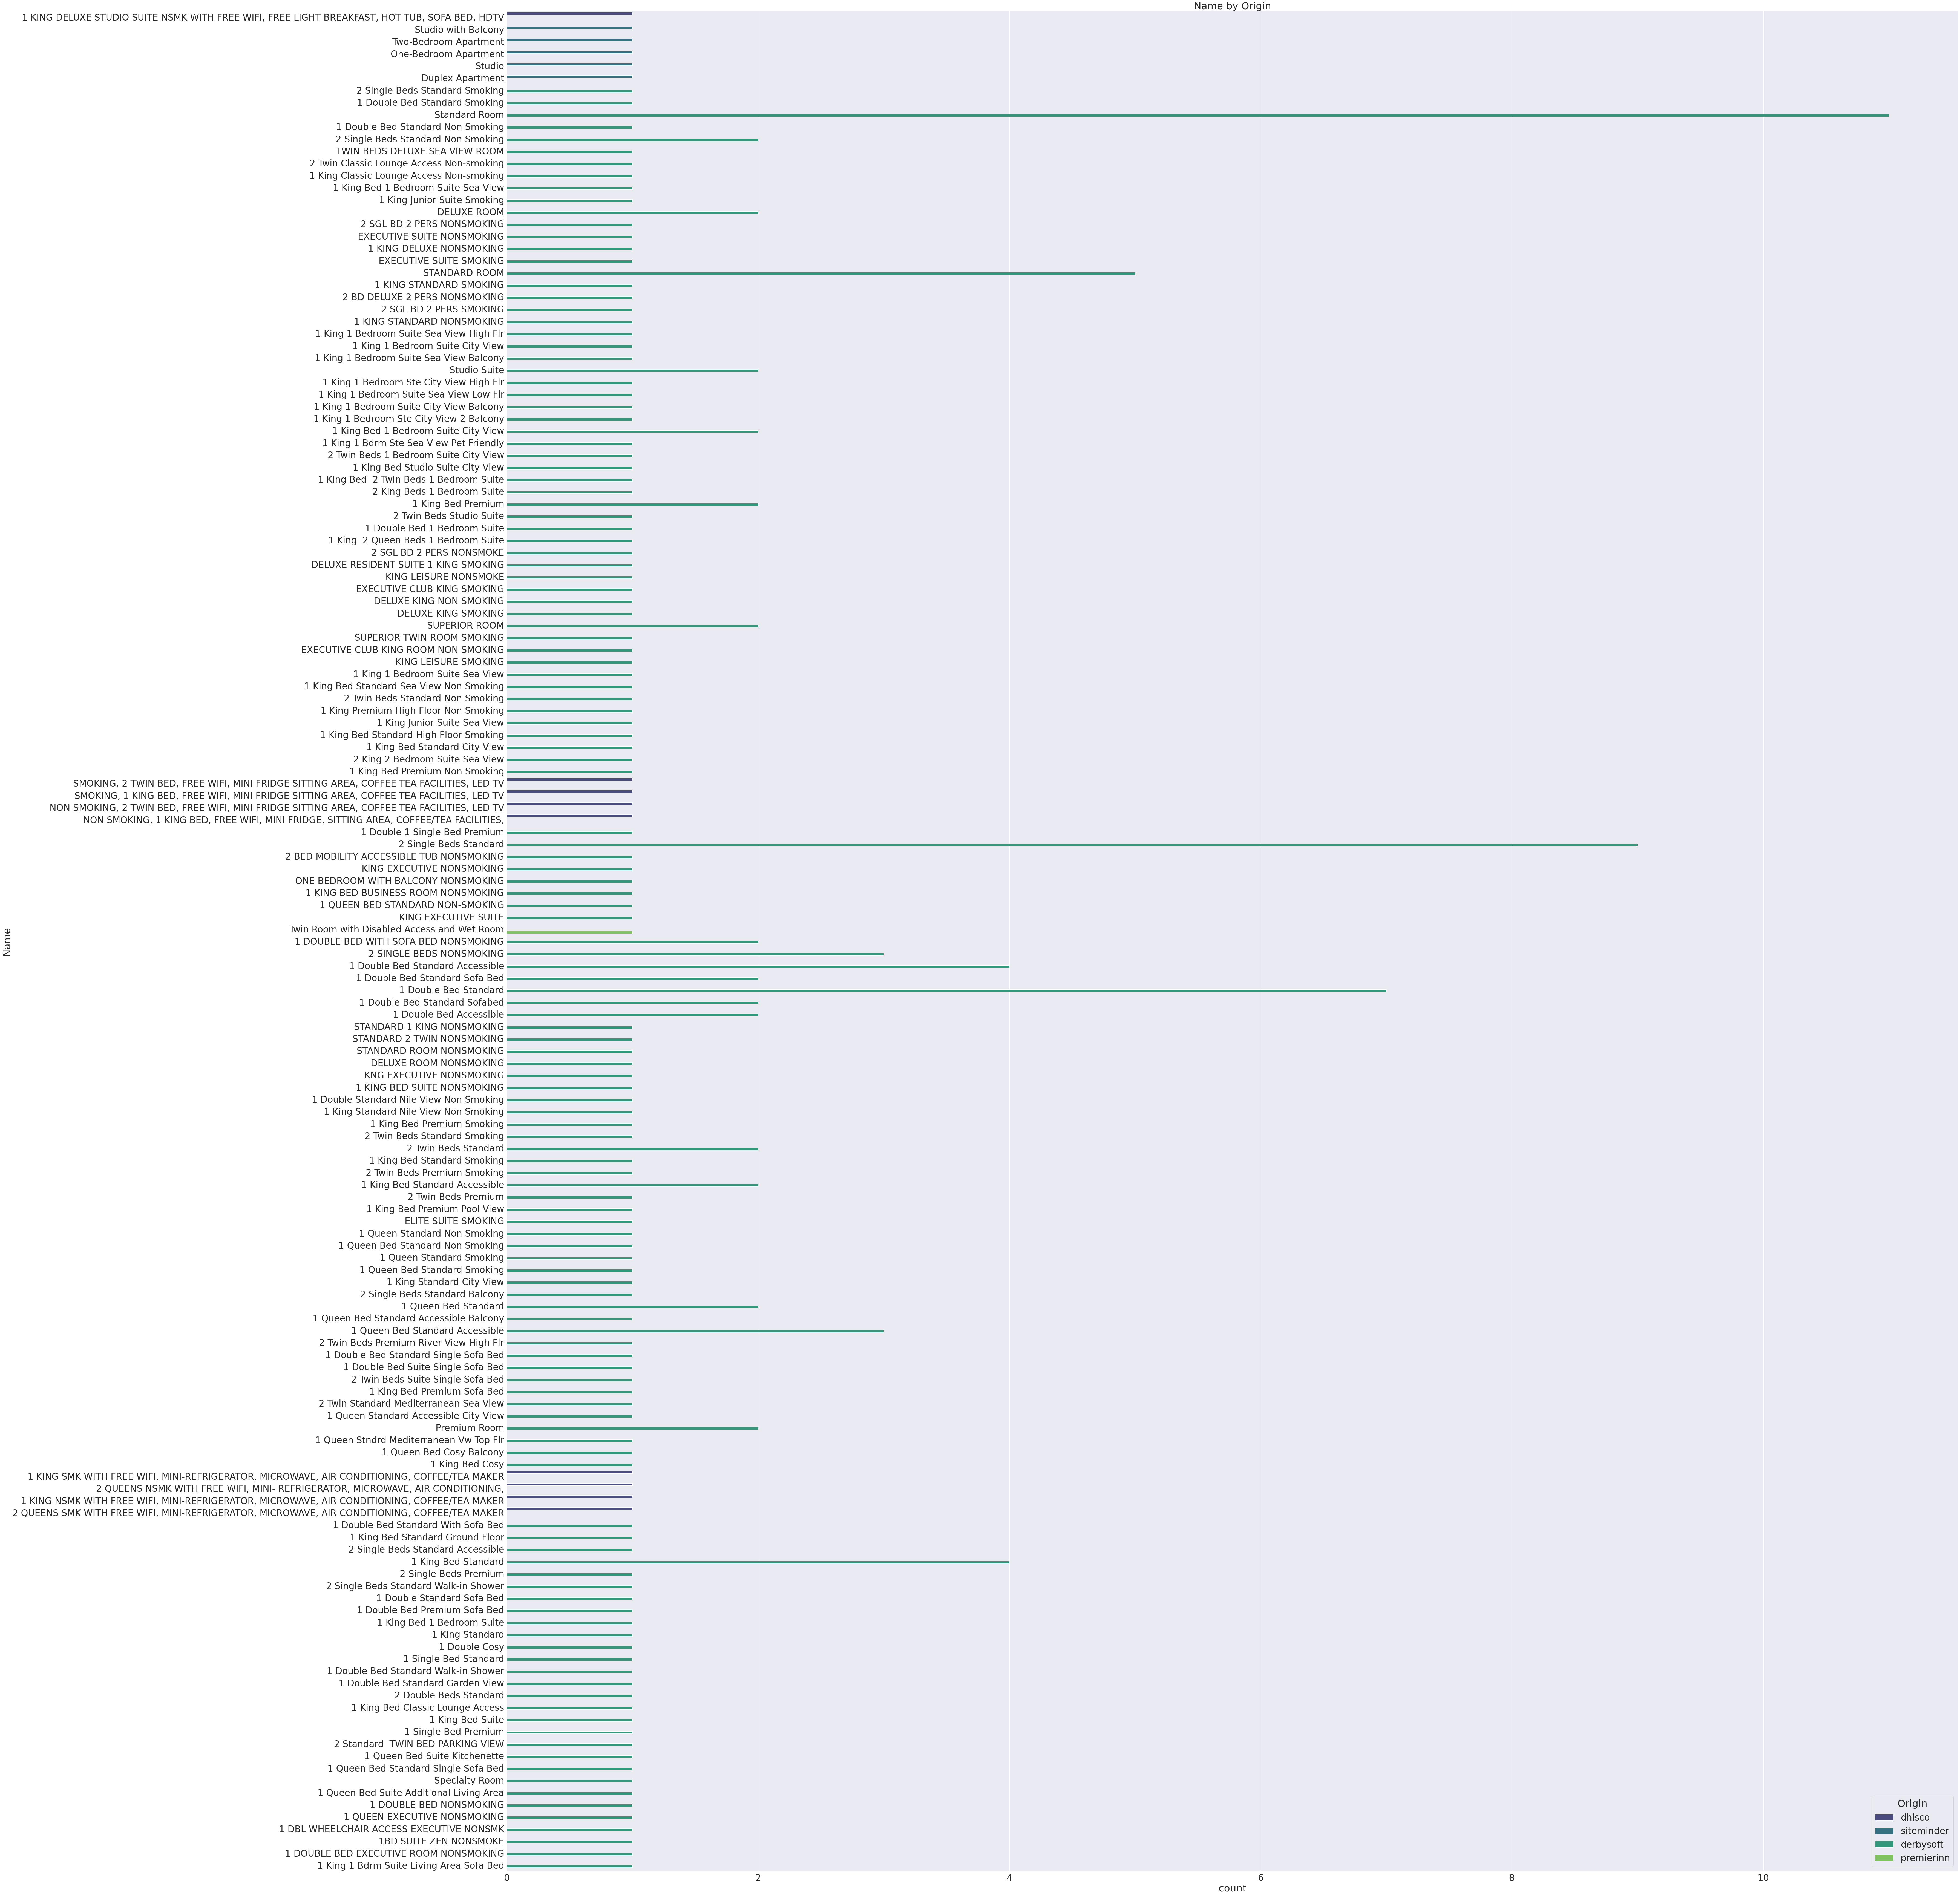

In [57]:
plt.figure(figsize=(95,125))
sns.set(font_scale = 3)
sns.countplot(y = RoomCreated.Name, hue = RoomCreated.Origin, data = RoomCreated, palette = 'viridis', orient = 'h')
plt.title("Name by Origin")
plt.show()

#### Checking against null values for MaxAdults

In [58]:
RoomCreated.MaxAdults.isna().sum()

0

#### MaxAdults breaking by Origin

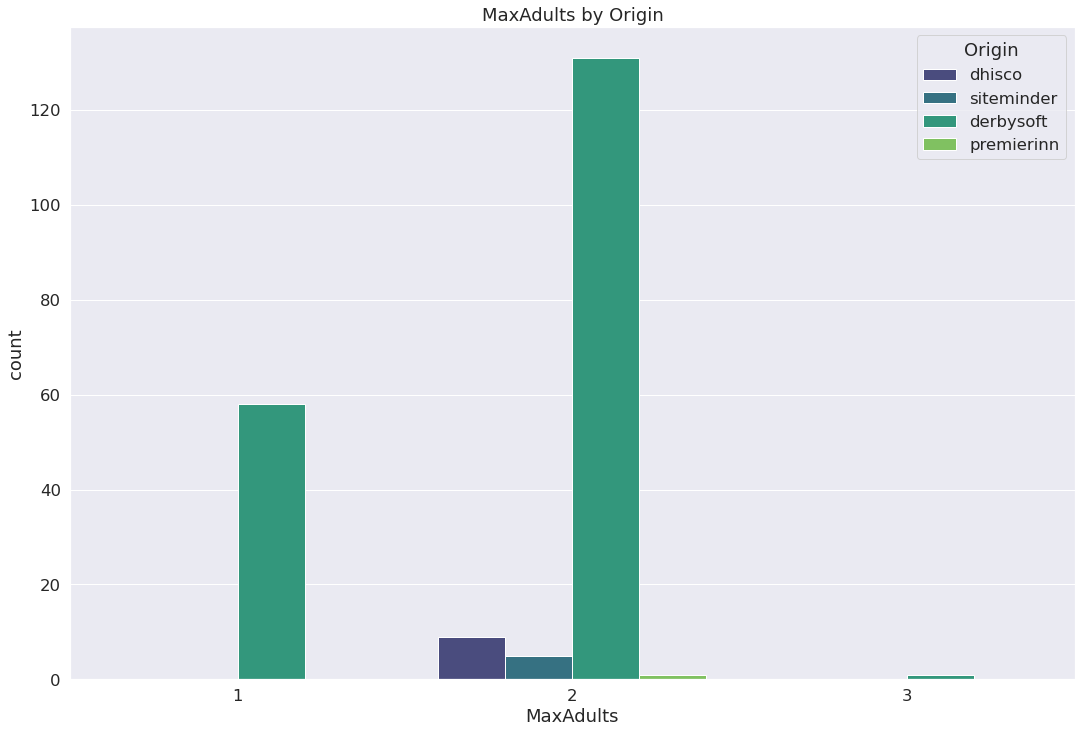

In [59]:
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.5)
sns.countplot(x = RoomCreated.MaxAdults, hue = RoomCreated.Origin, data = RoomCreated, palette = 'viridis')
plt.title('MaxAdults by Origin')
plt.show()

#### Breaking ExtraChildren by Origin

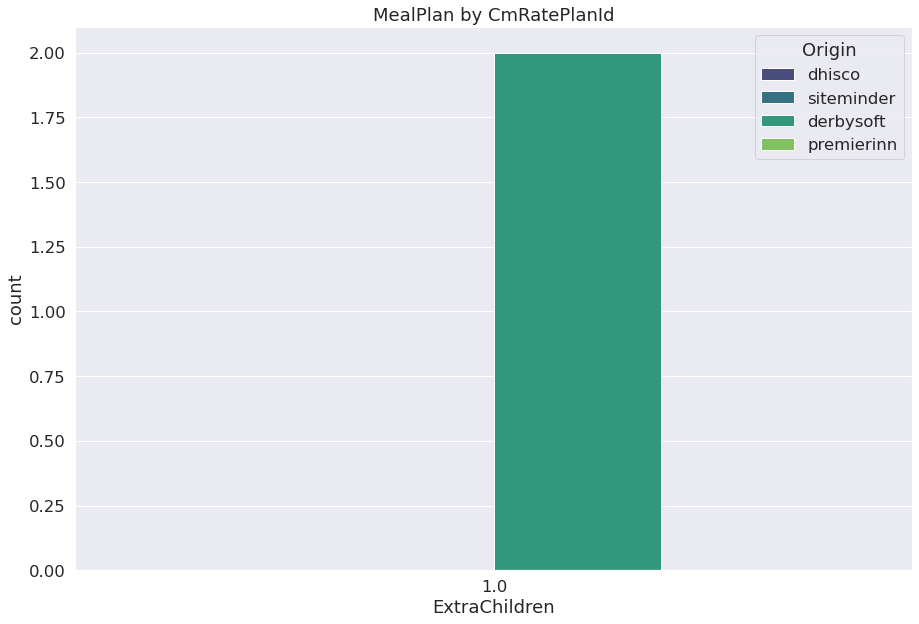

In [61]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = RoomCreated.ExtraChildren, hue = RoomCreated.Origin, data = RoomCreated, palette = 'viridis')
plt.title('MealPlan by CmRatePlanId')
plt.show()

#### Checking against null values forMaxChildAge

In [62]:
RoomCreated.MaxChildAge.isna().sum()

203

#### Breaking MaxChildAge by Origin

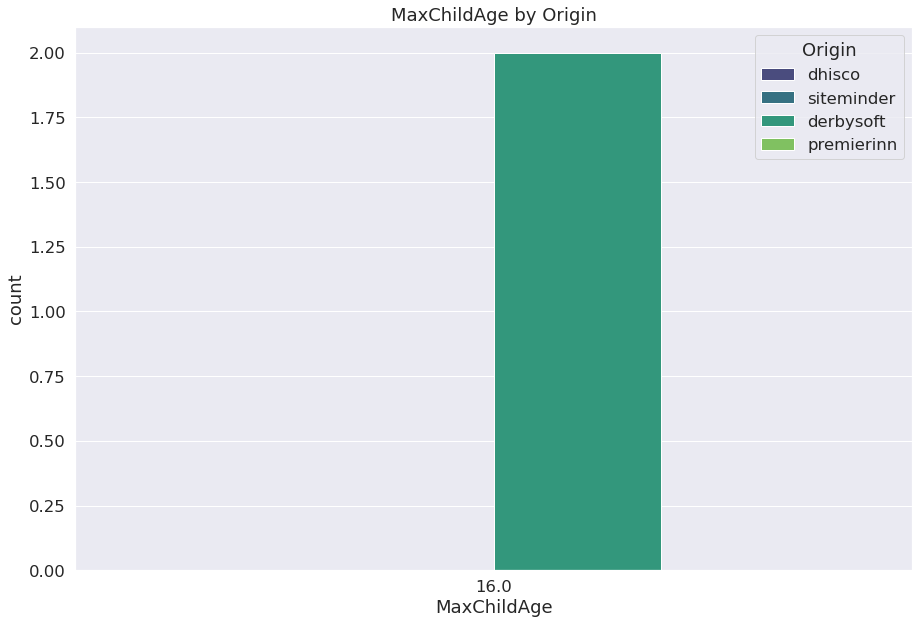

In [64]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x = RoomCreated.MaxChildAge, hue = RoomCreated.Origin, data = RoomCreated, palette = 'viridis')
plt.title('MaxChildAge by Origin')
plt.show()

#### Checking against null values for Description

In [65]:
RoomCreated.Description.isna().sum()

190

####  Breaking Description by Origin

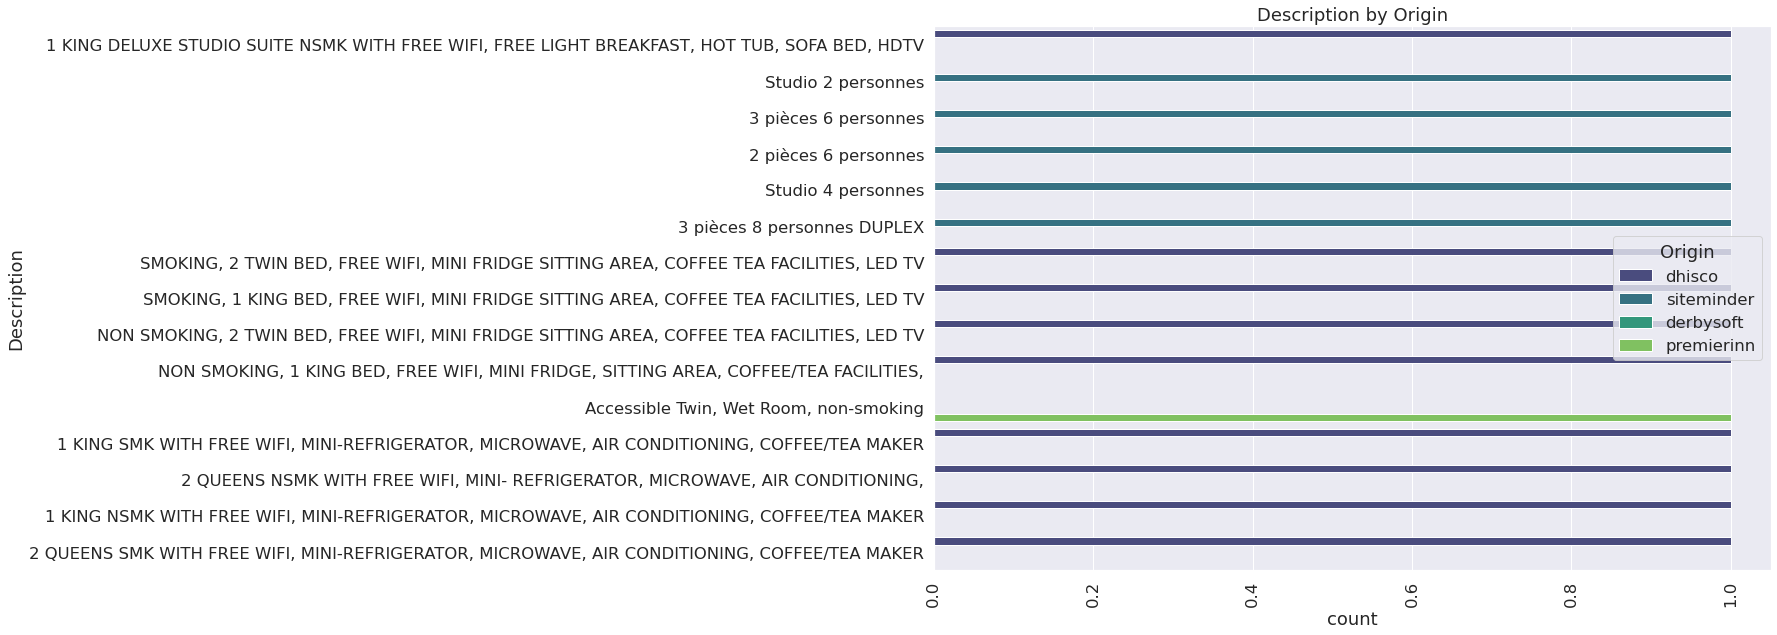

In [68]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(y = RoomCreated.Description, hue = RoomCreated.Origin, data = RoomCreated, palette = 'viridis')
plt.title('Description by Origin')
plt.show()